In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# to display any number of row or columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None

## Reading the data

In [3]:
# loading the data from loacal storage
app_data = pd.read_csv("/home/etg-manoj/Downloads/Files/DualCaseStudy/application_data.csv")
pre_data = pd.read_csv("/home/etg-manoj/Downloads/Files/DualCaseStudy/previous_application.csv")

In [4]:
# printing the number of rows and columns in application data and previous _data
print("# of rows in application data:",app_data.shape[0])
print("# of columns in application data:",app_data.shape[1])
print("# of rows in previous application data:",pre_data.shape[0])
print("# of columns in previous application data:",pre_data.shape[1])

# of rows in application data: 307511
# of columns in application data: 122
# of rows in previous application data: 1670214
# of columns in previous application data: 37


In [5]:
#  descriptive analysis
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [6]:
# checking the number of nulls in application_data
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
# checking the variable type
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [8]:
# list the cols with having more than 50%
null_cols=app_data.isnull().sum()
null_cols=null_cols[null_cols.values>(len(null_cols)*0.5)]
null_cols

AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE          

In [9]:
len(null_cols)

64

In [10]:
# remove the above listed 64 null columns
app_data1 = app_data[[i for i in app_data.columns if i not in null_cols]]
app_data1.shape

(307511, 58)

In [11]:
# cols with less null percentage
app_data1.isnull().sum()/len(app_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


Here 'AMT_ANNUITY' has few nill rows. So we'll use median to fill the missing blank values

In [12]:
val=app_data1.AMT_ANNUITY.median()
app_data1.loc[app_data1.AMT_ANNUITY.isnull(),'AMT_ANNUITY']=val

/home/etg-manoj/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
app_data1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [14]:
#  will remove all the unwanted cols
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_data1.drop(labels=unwanted,axis=1,inplace=True)

/home/etg-manoj/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Categorical analysis

In [15]:
# there are XNA values in ORGANIZATION_TYPE and CODE_GENDER
app_data1[app_data1.ORGANIZATION_TYPE=='XNA'].shape

(55374, 28)

In [16]:
app_data1.ORGANIZATION_TYPE.describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [17]:
# dropping of XNA values in ORGANIZATION_TYPE col
app_data1=app_data1.drop(app_data1.loc[app_data1.ORGANIZATION_TYPE=='XNA'].index)
app_data1[app_data1.ORGANIZATION_TYPE=='XNA'].shape

(0, 28)

In [18]:
app_data1[app_data1.CODE_GENDER=='XNA'].shape

(4, 28)

In [19]:
app_data1.CODE_GENDER.describe()

count     252137
unique         3
top            F
freq      157177
Name: CODE_GENDER, dtype: object

In [20]:
app_data1.CODE_GENDER.value_counts()

F      157177
M       94956
XNA         4
Name: CODE_GENDER, dtype: int64

In [21]:
# Here we can remove the XNA rows or just replace them with most majority repeated rows i.e F
app_data1.loc[app_data1.CODE_GENDER=='XNA','CODE_GENDER']='F'


In [22]:
app_data1.CODE_GENDER.value_counts()

F    157181
M     94956
Name: CODE_GENDER, dtype: int64

In [23]:
app_data1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

In [24]:
app_data1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   
3  House / apartment                    0.008019      -19005          -3039   
4  House / apartment                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH WEEKDAY_APPR_PROCESS_START  \
0            -3648.0            -2120                  WEDNESDAY   
1            -1186.0             -291                     MONDAY   
2            -4260.0            -2531                     MONDAY   
3            -9833.0            -2437                  WEDNESDAY   
4            -4311.0            -3458                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  
0  Business Entity Type 3  
1                  School  
2              Government  
3  Business Entity Type 3  
4                Religion

In [25]:
# create bins for 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'
app_data1['AMT_INCOME_RANGE']=pd.cut(app_data1.AMT_INCOME_TOTAL, bins=[0,50000,100000,500000,1000000,3000000], labels=['low','below_avg','avg','high','very high'])

In [26]:
app_data1['AMT_CREDIT_RANGE']=pd.cut(app_data1.AMT_CREDIT,bins=[0,100000,500000,900000,100000000], labels=['low','avg','high','very high'])

In [27]:
# based on target divide into 2 datasets
target1=app_data1.loc[app_data1.TARGET==1]
target0=app_data1.loc[app_data1.TARGET==0]


In [28]:
target1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0        100002       1         Cash loans           M            N   
26       100031       1         Cash loans           F            N   
40       100047       1         Cash loans           M            N   
42       100049       1         Cash loans           F            N   
94       100112       1         Cash loans           M            Y   
110      100130       1         Cash loans           F            N   
138      100160       1         Cash loans           M            N   
154      100181       1         Cash loans           F            N   
163      100192       1         Cash loans           F            N   
180      100209       1    Revolving loans           M            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 Y             0          202500.0    406597.5      24700.5   
26                Y             0          112500.0    979992.0      27076.5   
40                Y             0          202500.0   1193580.0      35028.0   
42                N             0          135000.0    288873.0      16258.5   
94                Y             0          315000.0    953460.0      64107.0   
110               Y             1          157500.0    723996.0      30802.5   
138               Y             0          292500.0    675000.0      36747.0   
154               Y             0          157500.0    245619.0      12667.5   
163               N             0          111915.0    225000.0      21037.5   
180               Y             3          180000.0    540000.0      27000.0   

         NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                 Working  Secondary / secondary special   
26                Working  Secondary / secondary special   
40   Commercial associate  Secondary / secondary special   
42                Working  Secondary / secondary special   
94   Commercial associate              Incomplete higher   
110  Commercial associate              Incomplete higher   
138               Working               Higher education   
154               Working  Secondary / secondary special   
163  Commercial associate  Secondary / secondary special   
180  Commercial associate               Higher education   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0    Single / not married  House / apartment                    0.018801   
26                  Widow  House / apartment                    0.018029   
40                Married  House / apartment                    0.025164   
42         Civil marriage  House / apartment                    0.007305   
94   Single / not married       With parents                    0.030755   
110             Separated  House / apartment                    0.007274   
138               Married  House / apartment                    0.035792   
154  Single / not married  House / apartment                    0.022625   
163  Single / not married       With parents                    0.018801   
180               Married  House / apartment                    0.024610   

     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0         -9461           -637            -3648.0            -2120   
26       -18724          -2628            -6573.0            -1827   
40       -17482          -1262            -1182.0            -1029   
42       -13384          -3597              -45.0            -4409   
94       -10199          -2015            -4802.0            -1038   
110      -10526           -267             -387.0            -3190   
138      -16667           -200            -5239.0             -114   
154      -17538          -7676             -774.0            -1082   
163       -7989           -150            -2570.0             -646   
180      -15326          -1038             -782.0             -792   

    WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0             

In [29]:
target0.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1                N             0          270000.0   1293502.5      35698.5   
2                Y             0           67500.0    135000.0       6750.0   
3                Y             0          135000.0    312682.5      29686.5   
4                Y             0          121500.0    513000.0      21865.5   
5                Y             0           99000.0    490495.5      27517.5   
6                Y             1          171000.0   1560726.0      41301.0   
7                Y             0          360000.0   1530000.0      42075.0   
9                Y             0          135000.0    405000.0      20250.0   
10               Y             1          112500.0    652500.0      21177.0   
12               Y             0           67500.0     80865.0       5881.5   

        NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
1          State servant               Higher education               Married   
2                Working  Secondary / secondary special  Single / not married   
3                Working  Secondary / secondary special        Civil marriage   
4                Working  Secondary / secondary special  Single / not married   
5          State servant  Secondary / secondary special               Married   
6   Commercial associate               Higher education               Married   
7          State servant               Higher education               Married   
9                Working  Secondary / secondary special  Single / not married   
10               Working               Higher education               Married   
12               Working  Secondary / secondary special               Married   

    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1   House / apartment                    0.003541      -16765          -1188   
2   House / apartment                    0.010032      -19046           -225   
3   House / apartment                    0.008019      -19005          -3039   
4   House / apartment                    0.028663      -19932          -3038   
5   House / apartment                    0.035792      -16941          -1588   
6   House / apartment                    0.035792      -13778          -3130   
7   House / apartment                    0.003122      -18850           -449   
9   House / apartment                    0.019689      -14469          -2019   
10  House / apartment                    0.022800      -10197           -679   
12  House / apartment                    0.031329      -13439          -2717   

    DAYS_REGISTRATION  DAYS_ID_PUBLISH WEEKDAY_APPR_PROCESS_START  \
1             -1186.0             -291                     MONDAY   
2             -4260.0            -2531                     MONDAY   
3             -9833.0            -2437                  WEDNESDAY   
4             -4311.0            -3458                   THURSDAY   
5             -4970.0             -477                  WEDNESDAY   
6             -1213.0             -619                     SUNDAY   
7             -4597.0            -2379                     MONDAY   
9            -14437.0            -3992

In [30]:
# Imbalance percentage
# i.e len(target0/taget1)
len(target0)/len(target1)

10.547378062743302

The imbalance ratio is 10.54

In [31]:
target0.CODE_GENDER

1         F
2         M
3         F
4         M
5         M
6         F
7         M
9         M
10        F
12        F
13        M
14        F
15        M
16        M
17        F
18        F
19        F
20        M
21        F
22        F
24        M
25        F
27        M
28        M
29        M
30        F
31        F
32        F
33        M
34        F
35        F
36        F
37        M
39        M
41        F
44        M
45        F
47        F
48        F
49        M
50        F
51        M
52        M
53        F
55        F
57        M
58        M
59        M
60        F
61        M
63        F
64        M
65        M
66        F
67        M
68        F
69        M
70        M
71        M
72        M
73        M
74        F
75        F
76        F
77        M
78        F
80        F
82        M
83        M
85        M
86        F
87        F
88        F
89        F
90        F
91        F
92        M
93        F
95        M
96        F
97        F
98        F
100       F
101 

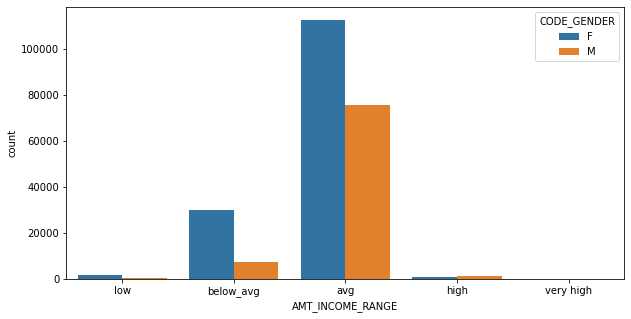

In [32]:
# plotting for income range
plt.figure(figsize=(10,5))
sns.countplot(x=target0.AMT_INCOME_RANGE,hue=target0.CODE_GENDER)
plt.show()

## Inference
1. Very less count for income range high and very high.
2. Female counts are higher than male.
3. This graph show that females are more than male in having credits for that range.


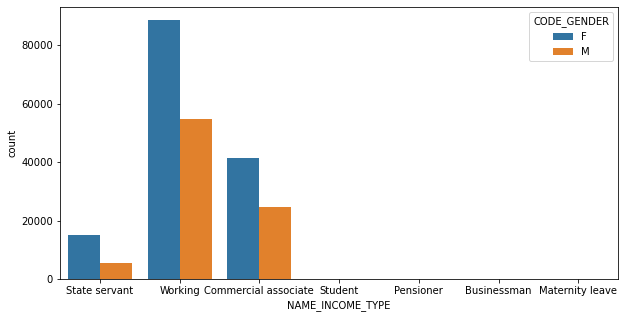

In [33]:
# plotting for income type
plt.figure(figsize=(10,5))
sns.countplot(x=target0.NAME_INCOME_TYPE,hue=target0.CODE_GENDER)
plt.show()

## Inference
1. Number of credits is in order Working, Commercial Associate and State Servant.
2. Almost negligible credits for Student, Pensioner, Businessman,Maternity leave

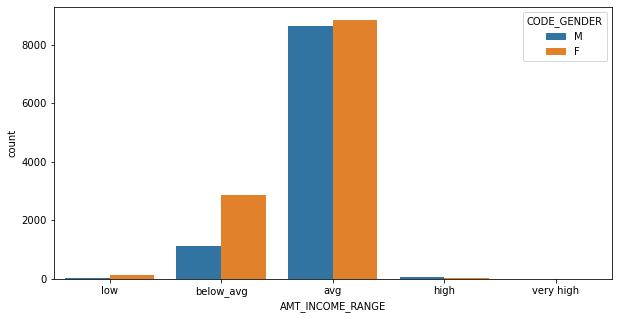

In [34]:
# plotting for income range
plt.figure(figsize=(10,5))
sns.countplot(x=target1.AMT_INCOME_RANGE,hue=target1.CODE_GENDER)
plt.show()

## Inference
1. Female count is more than male
2. Income range between 100000-500000 has more number of credits than others
3. Females have more credit than males

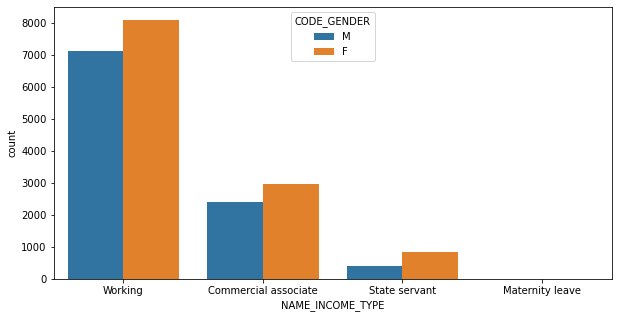

In [35]:
# plotting for income type
plt.figure(figsize=(10,5))
sns.countplot(x=target1.NAME_INCOME_TYPE,hue=target1.CODE_GENDER)
plt.show()

## Inferences
1. Females have more credit than males
2. Working has highest number of credits than others.
3. Almost negligible credits for Maternity leave compared to others 

In [36]:
# correlation for numerical columns for both target 1 and 0
corr_target0=target0.iloc[0:,2:]
corr_target1=target1.iloc[0:,2:]

target_0=corr_target0.corr(method='spearman')
target_1=corr_target1.corr(method='spearman')

In [83]:
target_0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.021950   -0.023652   
AMT_INCOME_TOTAL                -0.021950          1.000000    0.403876   
AMT_CREDIT                      -0.023652          0.403876    1.000000   
AMT_ANNUITY                     -0.010795          0.472204    0.826689   
REGION_POPULATION_RELATIVE      -0.030579          0.110074    0.060706   
DAYS_BIRTH                       0.266534         -0.054666   -0.169030   
DAYS_EMPLOYED                    0.030948         -0.060868   -0.104251   
DAYS_REGISTRATION                0.155518          0.040559   -0.015318   
DAYS_ID_PUBLISH                 -0.119164         -0.036702   -0.038197   
HOUR_APPR_PROCESS_START         -0.030162          0.073503    0.036923   
REG_REGION_NOT_LIVE_REGION      -0.022813          0.077634    0.015118   
REG_REGION_NOT_WORK_REGION      -0.015475          0.159962    0.041693   
LIVE_REGION_NOT_WORK_REGION     -0.005576          0.148281    0.045175   
REG_CITY_NOT_LIVE_CITY           0.002344         -0.001023   -0.040616   
REG_CITY_NOT_WORK_CITY           0.007487         -0.013856   -0.037000   
LIVE_CITY_NOT_WORK_CITY          0.013295         -0.004758   -0.011194   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                   -0.010795                   -0.030579   
AMT_INCOME_TOTAL                0.472204                    0.110074   
AMT_CREDIT                      0.826689                    0.060706   
AMT_ANNUITY                     1.000000                    0.064328   
REGION_POPULATION_RELATIVE      0.064328                    1.000000   
DAYS_BIRTH                     -0.100287                   -0.041663   
DAYS_EMPLOYED                  -0.074643                    0.000900   
DAYS_REGISTRATION               0.010712                   -0.042400   
DAYS_ID_PUBLISH                -0.027354                   -0.010299   
HOUR_APPR_PROCESS_START         0.032953                    0.133213   
REG_REGION_NOT_LIVE_REGION      0.033435                   -0.025292   
REG_REGION_NOT_WORK_REGION      0.070841                    0.032446   
LIVE_REGION_NOT_WORK_REGION     0.069051                    0.056814   
REG_CITY_NOT_LIVE_CITY         -0.019954                   -0.049779   
REG_CITY_NOT_WORK_CITY         -0.024085                   -0.034808   
LIVE_CITY_NOT_WORK_CITY        -0.008087                   -0.007332   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                   0.266534       0.030948           0.155518   
AMT_INCOME_TOTAL              -0.054666      -0.060868           0.040559   
AMT_CREDIT                    -0.169030      -0.104251          -0.015318   
AMT_ANNUITY                   -0.100287      -0.074643           0.010712   
REGION_POPULATION_RELATIVE    -0.041663       0.000900          -0.042400   
DAYS_BIRTH                     1.000000       0.307787           0.265449   
DAYS_EMPLOYED                  0.307787       1.000000           0.126708   
DAYS_REGISTRATION              0.265449       0.126708           1.000000   
DAYS_ID_PUBLISH                0.083331       0.106823           0.036788   
HOUR_APPR_PROCESS_START        0.051299       0.026444          -0.029553   
REG_REGION_NOT_LIVE_REGION     0.058627       0.065435           0.017715   
REG_REGION_NOT_WORK_REGION     0.038104       0.086966           0.015092   
LIVE_REGION_NOT_WORK_REGION    0.012789       0.063533           0.007716   
REG_CITY_NOT_LIVE_CITY         0.167477       0.118224           0.038064   
REG_CITY_NOT_WORK_CITY         0.111539       0.125954           0.047339   
LIVE_CITY_NOT_WORK_CITY        0.029007       0.069567           0.027231   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                       -0.119164                -0.030162   
AMT_INCOME_TOTAL                   -0.036702                 0.073503   

In [84]:
target_1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.039123    0.000427   
AMT_INCOME_TOTAL                -0.039123          1.000000    0.364559   
AMT_CREDIT                       0.000427          0.364559    1.000000   
AMT_ANNUITY                      0.015133          0.428947    0.812093   
REGION_POPULATION_RELATIVE      -0.029682          0.058005    0.043545   
DAYS_BIRTH                       0.175025         -0.103026   -0.200718   
DAYS_EMPLOYED                    0.006823         -0.053798   -0.107605   
DAYS_REGISTRATION                0.110854          0.011378   -0.021973   
DAYS_ID_PUBLISH                 -0.091042         -0.051113   -0.065143   
HOUR_APPR_PROCESS_START         -0.040338          0.078779    0.024616   
REG_REGION_NOT_LIVE_REGION      -0.035213          0.075615    0.015043   
REG_REGION_NOT_WORK_REGION      -0.040853          0.156374    0.032536   
LIVE_REGION_NOT_WORK_REGION     -0.027993          0.145982    0.034861   
REG_CITY_NOT_LIVE_CITY          -0.016072         -0.003813   -0.030974   
REG_CITY_NOT_WORK_CITY          -0.005444         -0.006241   -0.032882   
LIVE_CITY_NOT_WORK_CITY          0.009557          0.004230   -0.012465   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                    0.015133                   -0.029682   
AMT_INCOME_TOTAL                0.428947                    0.058005   
AMT_CREDIT                      0.812093                    0.043545   
AMT_ANNUITY                     1.000000                    0.028666   
REGION_POPULATION_RELATIVE      0.028666                    1.000000   
DAYS_BIRTH                     -0.100200                   -0.044444   
DAYS_EMPLOYED                  -0.060193                   -0.015246   
DAYS_REGISTRATION               0.019762                   -0.033490   
DAYS_ID_PUBLISH                -0.044128                   -0.017779   
HOUR_APPR_PROCESS_START         0.021129                    0.109400   
REG_REGION_NOT_LIVE_REGION      0.029646                   -0.032702   
REG_REGION_NOT_WORK_REGION      0.060363                   -0.008160   
LIVE_REGION_NOT_WORK_REGION     0.059724                    0.012602   
REG_CITY_NOT_LIVE_CITY         -0.011744                   -0.057239   
REG_CITY_NOT_WORK_CITY         -0.015938                   -0.044761   
LIVE_CITY_NOT_WORK_CITY        -0.003012                   -0.014753   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                   0.175025       0.006823           0.110854   
AMT_INCOME_TOTAL              -0.103026      -0.053798           0.011378   
AMT_CREDIT                    -0.200718      -0.107605          -0.021973   
AMT_ANNUITY                   -0.100200      -0.060193           0.019762   
REGION_POPULATION_RELATIVE    -0.044444      -0.015246          -0.033490   
DAYS_BIRTH                     1.000000       0.256870           0.192350   
DAYS_EMPLOYED                  0.256870       1.000000           0.086286   
DAYS_REGISTRATION              0.192350       0.086286           1.000000   
DAYS_ID_PUBLISH                0.146246       0.104244           0.061563   
HOUR_APPR_PROCESS_START        0.041994       0.010328          -0.044753   
REG_REGION_NOT_LIVE_REGION     0.046320       0.069566           0.006362   
REG_REGION_NOT_WORK_REGION     0.022208       0.082264           0.000896   
LIVE_REGION_NOT_WORK_REGION    0.000356       0.056081          -0.001416   
REG_CITY_NOT_LIVE_CITY         0.145884       0.118869           0.015831   
REG_CITY_NOT_WORK_CITY         0.096181       0.139863           0.039204   
LIVE_CITY_NOT_WORK_CITY        0.009633       0.069316           0.026105   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                       -0.091042                -0.040338   
AMT_INCOME_TOTAL                   -0.051113                 0.078779   

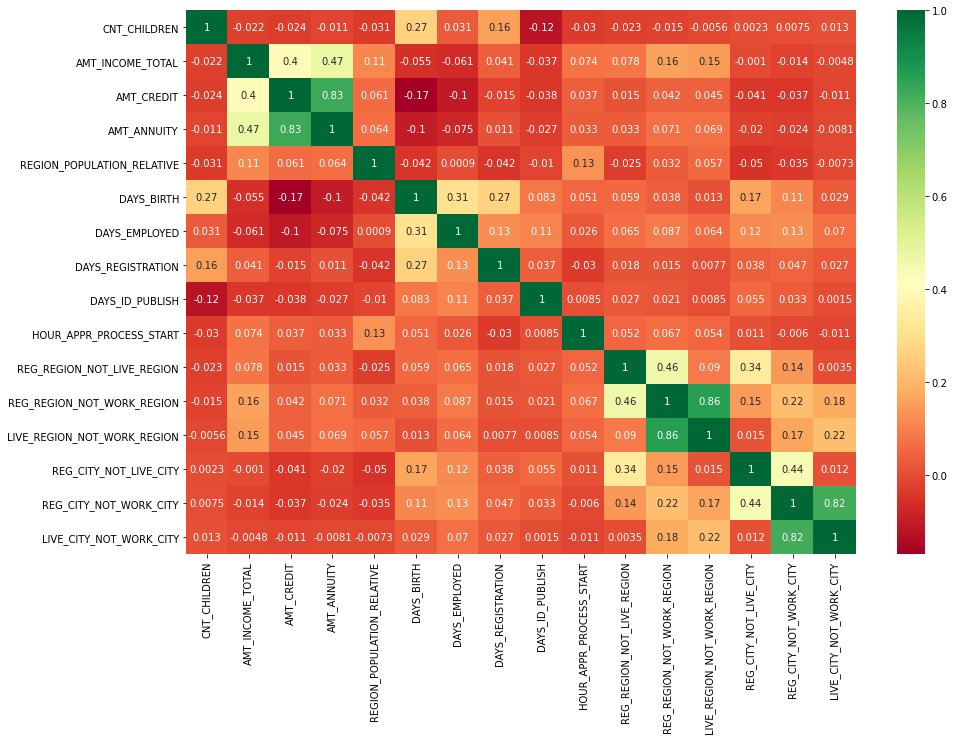

In [86]:
# for target 0
plt.figure(figsize=(15,10))
sns.heatmap(data=target_0,cmap='RdYlGn',annot=True)
plt.show()

## Inferences
1. Credit amount is higher in densely populated area
2. Income amount is also higher in densely populated area
3. In densely populated area, we've less child clients

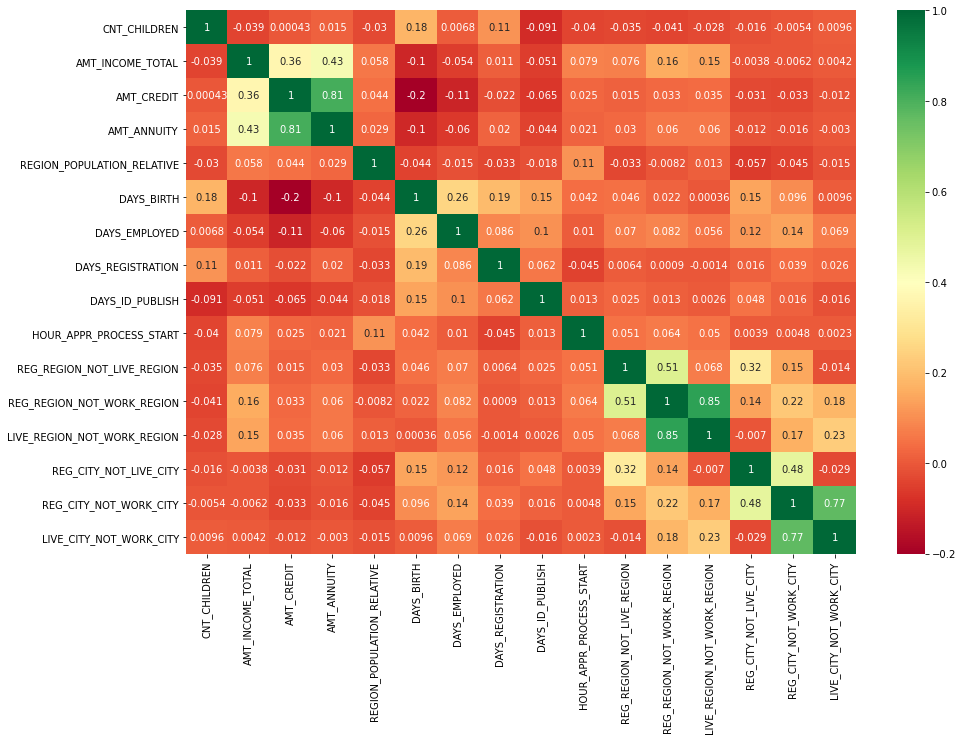

In [43]:
# for target 1
plt.figure(figsize=(15,10))
sns.heatmap(data=target_1,cmap='RdYlGn',annot=True)
plt.show()

## Inferences
1. Client's are having less children and  permanent address does not match with contact address

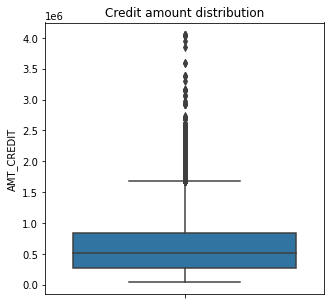

In [53]:
# outliers for target 0
# credit amount
plt.figure(figsize=(5,5))
sns.boxplot(y=target0.AMT_CREDIT)
plt.title('Credit amount distribution for target 0')
plt.show()

## Inferences
1. In credit amount, there are some outliers

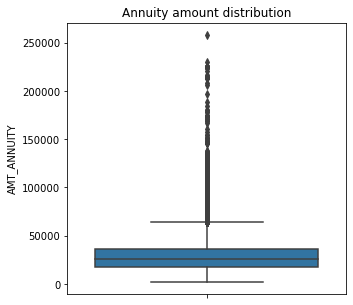

In [52]:
# annuity amount
plt.figure(figsize=(5,5))
sns.boxplot(y=target0.AMT_ANNUITY)
plt.title('Annuity amount distribution for target 0')
plt.show()

## Inferences
1. Outliers are detected in annuity amount.
2. 1st quartile is smaller than 3 =rd quartile

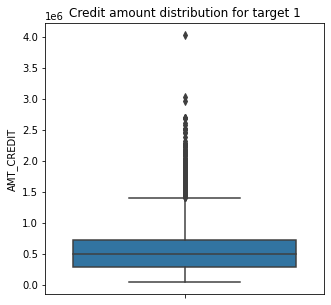

In [54]:
# target 1 outliers
# credit amount
plt.figure(figsize=(5,5))
sns.boxplot(y=target1.AMT_CREDIT)
plt.title('Credit amount distribution for target 1')
plt.show()

## Inferences
1. Some outliers are detected.
2. 3rd quartile is larger than 1st quartile i.e more number of credits in 3rd quartile.

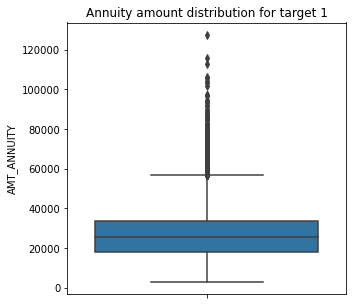

In [55]:
# annuity amount
plt.figure(figsize=(5,5))
sns.boxplot(y=target1.AMT_ANNUITY)
plt.title('Annuity amount distribution for target 1')
plt.show()

## Inferences
1. Outliers are detected.

## Bivariate analysis for numeric variables

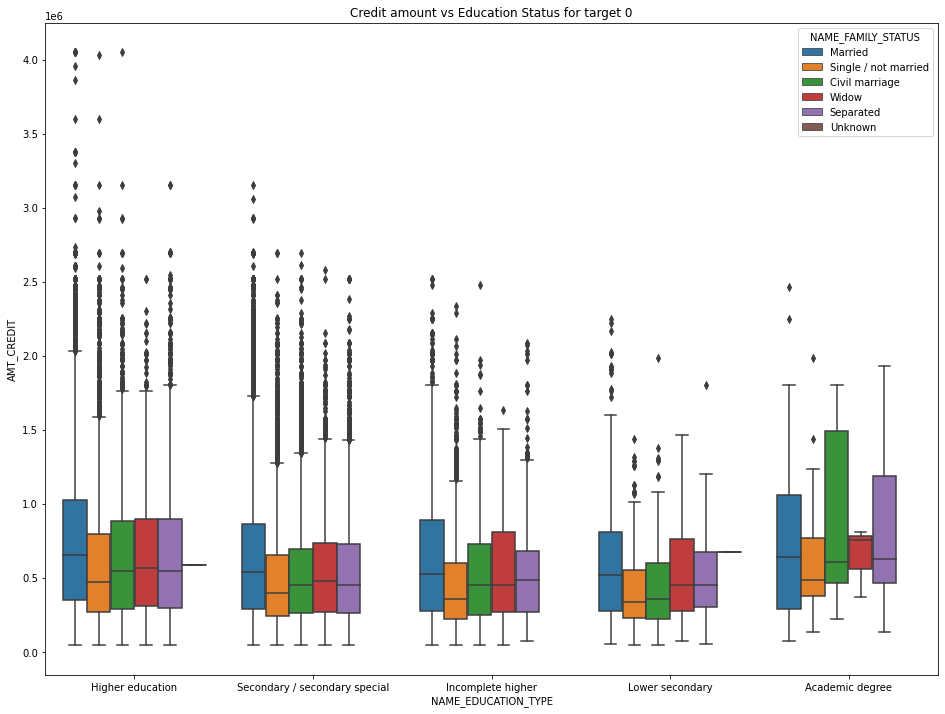

In [57]:
plt.figure(figsize=(16,12))
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for target 0')
plt.show()

## Inferences
1. Higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
2. Higher number of credits for the family staus of 'civil marriage', 'marriage' and 'separated' 

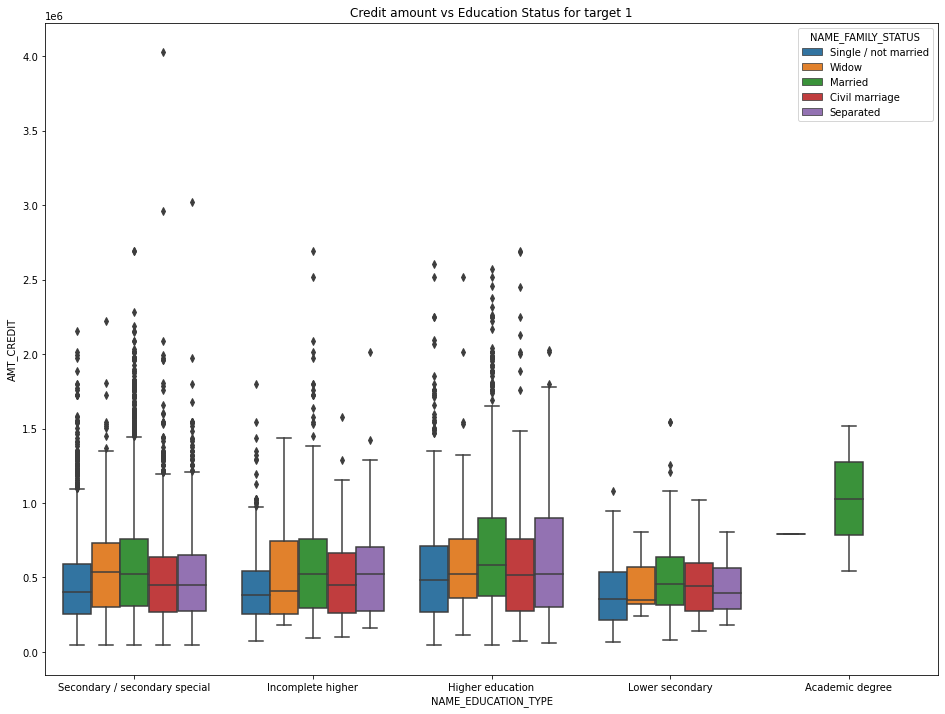

In [58]:
plt.figure(figsize=(16,12))
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for target 1')
plt.show()

## Inferences
1. Most of the outliers are from Education type 'Higher education' and 'Secondary'.
2. Quite similar with Target 0 From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.

In [65]:
#  cleaning the missing data for pre_data
# list the cols with having more than 50%
null_cols=pre_data.isnull().sum()
null_cols=null_cols[null_cols.values>(len(null_cols)*0.5)]
null_cols

AMT_ANNUITY                   372235
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

In [66]:
len(null_cols)

15

In [67]:
pre_data = pre_data[[i for i in pre_data.columns if i not in null_cols]]
pre_data.shape

(1670214, 22)

In [68]:
# Removing the column values of 'XNA' and 'XAP'

pre_data=pre_data.drop(pre_data[pre_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_data=pre_data.drop(pre_data[pre_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_data=pre_data.drop(pre_data[pre_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

pre_data.shape

(69635, 22)

In [69]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=app_data,right=pre_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [70]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [71]:
#  Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

Univariate analysis

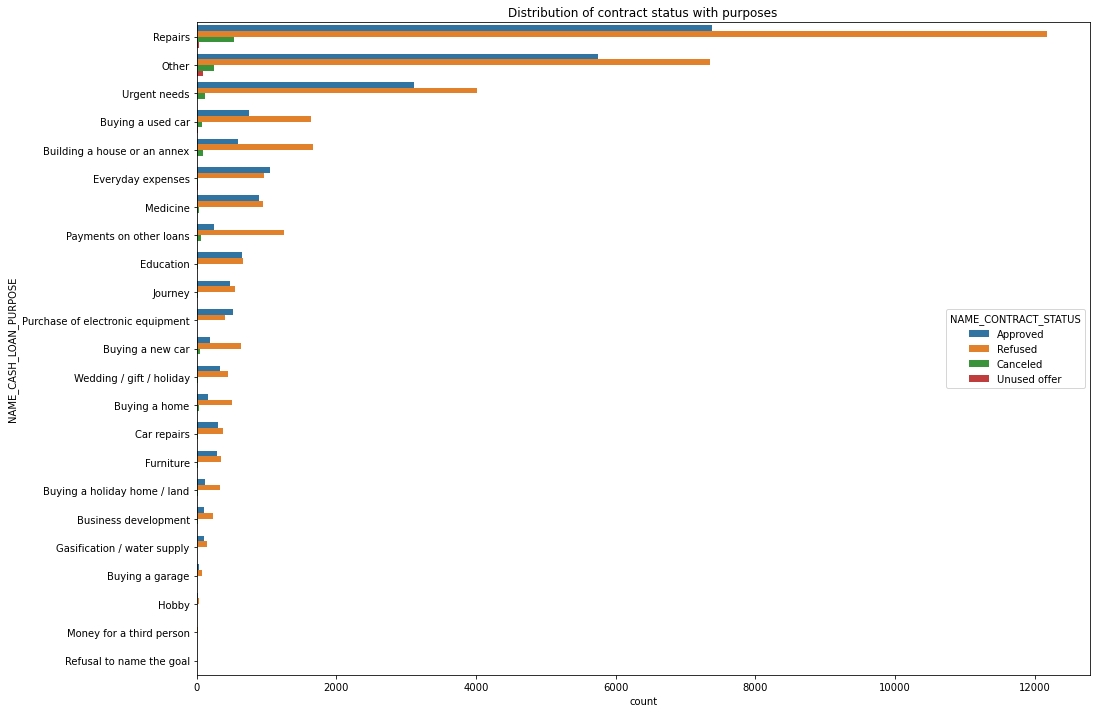

In [79]:
plt.figure(figsize=(16,12))
sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.title("Distribution of contract status with purposes")
plt.show()

## Inferences
1. Most rejection of loans came from purpose 'repairs'.
2. we have equal number of approves and rejection for education purposes 


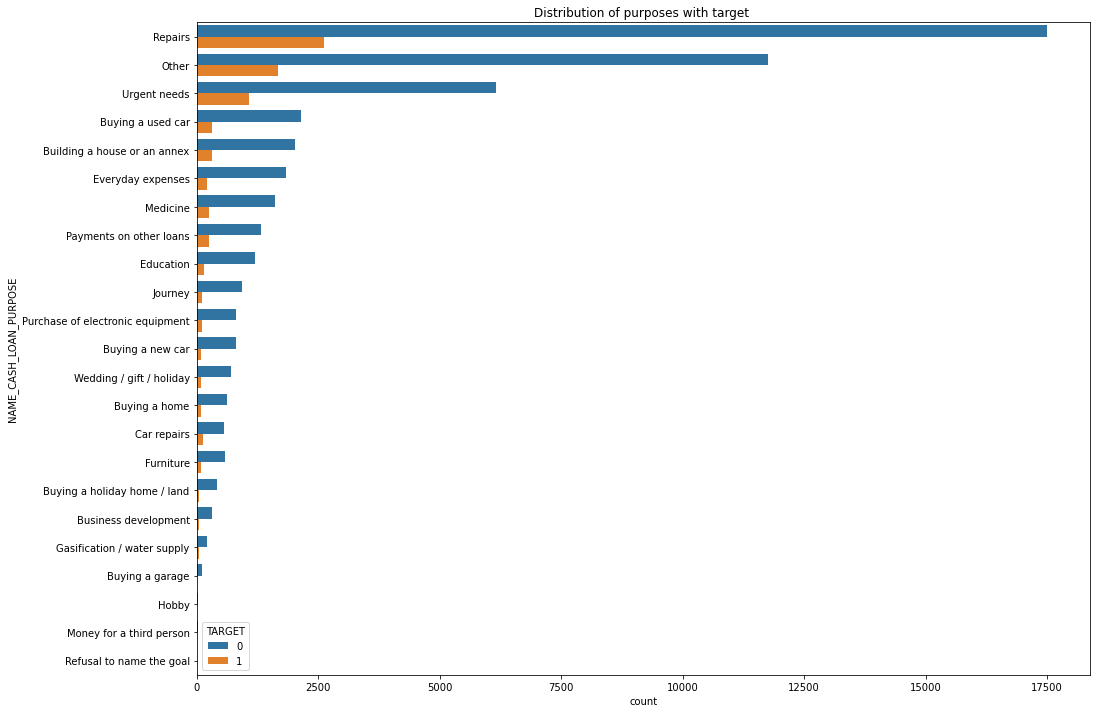

In [87]:
plt.figure(figsize=(16,12))
sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')
plt.title('Distribution of purposes with target ')
plt.show()

## Inferences
1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

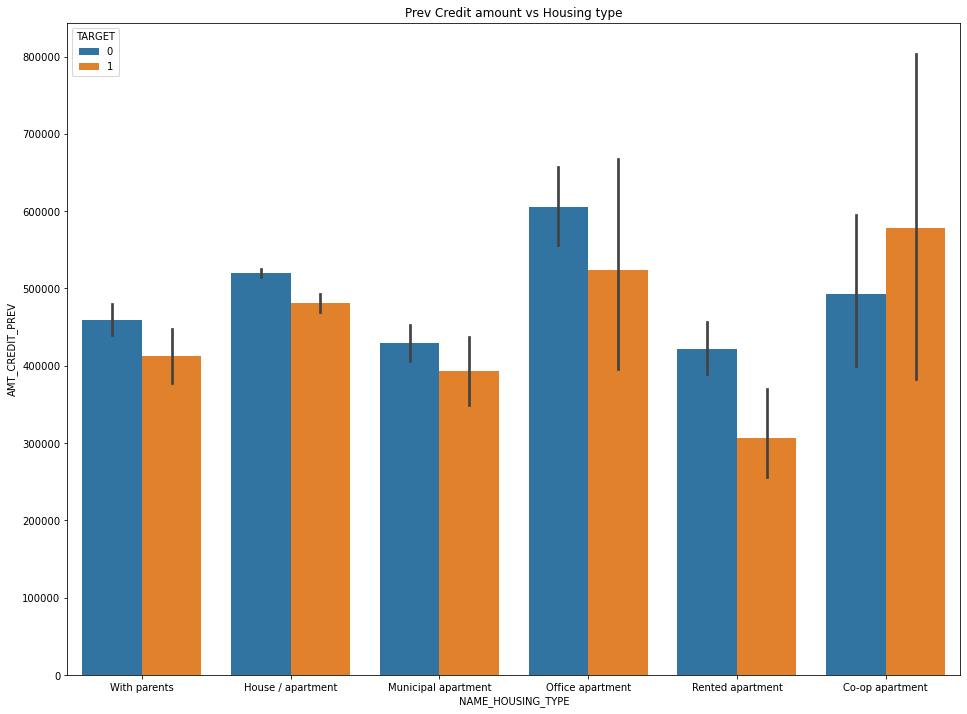

In [82]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
2. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

## Conclusion
1. As there are least unsucessful payments for 'With Parents' get as much as clients from housing type
2. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.